In [24]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
import os
import json
from PIL import Image

In [7]:
from google.colab import drive

## Loading and Exploring the COCO Dataset

In [3]:
!wget http://images.cocodataset.org/zips/train2017.zip -O coco_train2017.zip

--2024-02-08 03:59:39--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.77.60, 52.216.32.121, 52.217.43.84, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.77.60|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘coco_train2017.zip’

coco_train2017.zip  100%[===================>]  18.01G  46.8MB/s    in 8m 7s   

2024-02-08 04:07:46 (37.9 MB/s) - ‘coco_train2017.zip’ saved [19336861798/19336861798]



In [4]:
!wget http://images.cocodataset.org/zips/val2017.zip -O coco_val2017.zip

--2024-02-08 04:08:29--  http://images.cocodataset.org/zips/val2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 3.5.10.213, 54.231.169.137, 52.217.126.153, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|3.5.10.213|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 815585330 (778M) [application/zip]
Saving to: ‘coco_val2017.zip’

coco_val2017.zip    100%[===================>] 777.80M  46.4MB/s    in 17s     

2024-02-08 04:08:47 (44.8 MB/s) - ‘coco_val2017.zip’ saved [815585330/815585330]



In [5]:
!wget http://images.cocodataset.org/annotations/annotations_trainval2017.zip -O coco_ann2017.zip

--2024-02-08 04:09:31--  http://images.cocodataset.org/annotations/annotations_trainval2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.217.232.201, 16.182.34.193, 3.5.28.165, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.217.232.201|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 252907541 (241M) [application/zip]
Saving to: ‘coco_ann2017.zip’

coco_ann2017.zip    100%[===================>] 241.19M  45.9MB/s    in 5.7s    

2024-02-08 04:09:37 (42.4 MB/s) - ‘coco_ann2017.zip’ saved [252907541/252907541]



In [6]:
# Unzip the downloaded files
!unzip -q coco_train2017.zip -d /content/train2017
!unzip -q coco_val2017.zip -d /content/val2017
!unzip -q coco_ann2017.zip -d /content/annotations

In [8]:
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# !mkdir -p '/content/drive/My Drive/coco_dataset'
# !mv /content/train2017 '/content/drive/My Drive/coco_dataset/train2017'
# !mv /content/val2017 '/content/drive/My Drive/coco_dataset/val2017'
# !mv /content/annotations '/content/drive/My Drive/coco_dataset/annotations'

^C
^C
^C


# Define paths to the dataset directories

In [13]:
train_image_dir = '/content/train2017/train2017'
val_image_dir = '/content/val2017/val2017'
annotations_dir = '/content/annotations/annotations'

# Load COCO annotations

In [14]:
with open(os.path.join(annotations_dir, 'instances_train2017.json'), 'r') as f:
    train_annotations = json.load(f)

In [15]:
with open(os.path.join(annotations_dir, 'instances_val2017.json'), 'r') as f:
    val_annotations = json.load(f)

# Get basic statistics

In [16]:
num_train_images = len(train_annotations['images'])
num_val_images = len(val_annotations['images'])
num_train_objects = len(train_annotations['annotations'])
num_val_objects = len(val_annotations['annotations'])
num_categories = len(train_annotations['categories'])

# Print basic statistics

In [17]:
print("Number of training images:", num_train_images)
print("Number of validation images:", num_val_images)
print("Number of objects in training set:", num_train_objects)
print("Number of objects in validation set:", num_val_objects)
print("Number of object categories:", num_categories)

Number of training images: 118287
Number of validation images: 5000
Number of objects in training set: 860001
Number of objects in validation set: 36781
Number of object categories: 80


# Plot distribution of object categories

In [19]:
category_counts = {category['name']: 0 for category in train_annotations['categories']}
for annotation in train_annotations['annotations']:
    category_id = annotation['category_id']
    if category_id >= 1 and category_id <= num_categories:
        category_name = train_annotations['categories'][category_id - 1]['name']
        category_counts[category_name] += 1

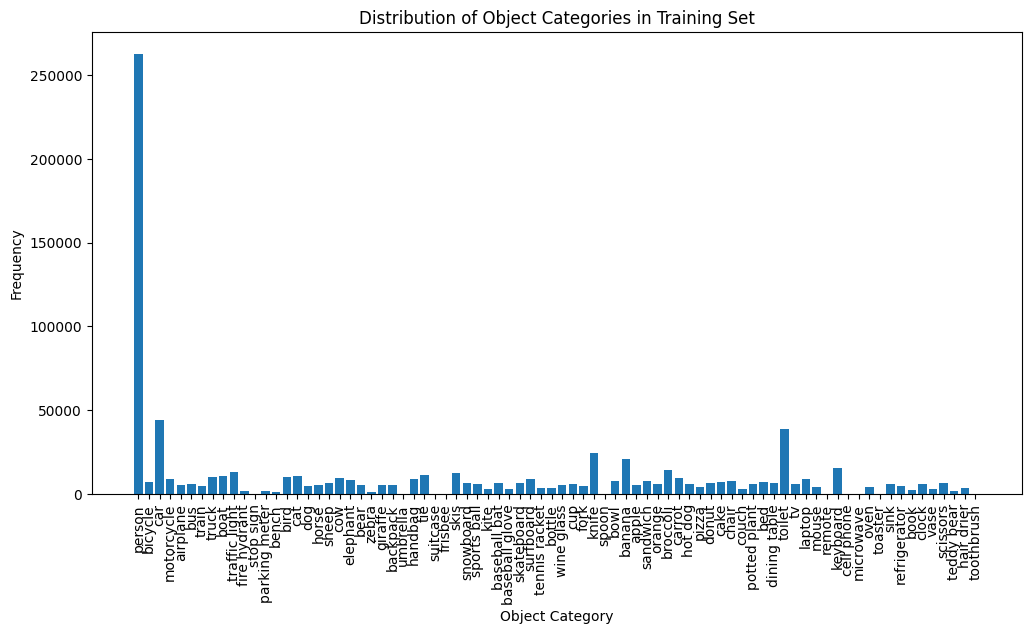

In [20]:
plt.figure(figsize=(12, 6))
plt.bar(category_counts.keys(), category_counts.values())
plt.xlabel('Object Category')
plt.ylabel('Frequency')
plt.title('Distribution of Object Categories in Training Set')
plt.xticks(rotation=90)
plt.show()

# Display sample images with bounding boxes

In [21]:
def display_samples(image_dir, annotations, num_samples=5):
    sample_images = np.random.choice(annotations['images'], num_samples)

    plt.figure(figsize=(15, 8))
    for i, image_info in enumerate(sample_images):
        image_path = os.path.join(image_dir, image_info['file_name'])
        image = Image.open(image_path)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(image)
        plt.axis('off')
        plt.title(f"Image ID: {image_info['id']}")
        # Add bounding boxes
        for annotation in annotations['annotations']:
            if annotation['image_id'] == image_info['id']:
                bbox = annotation['bbox']
                plt.gca().add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], linewidth=2, edgecolor='r', facecolor='none'))

    plt.show()

Sample images from the training set:


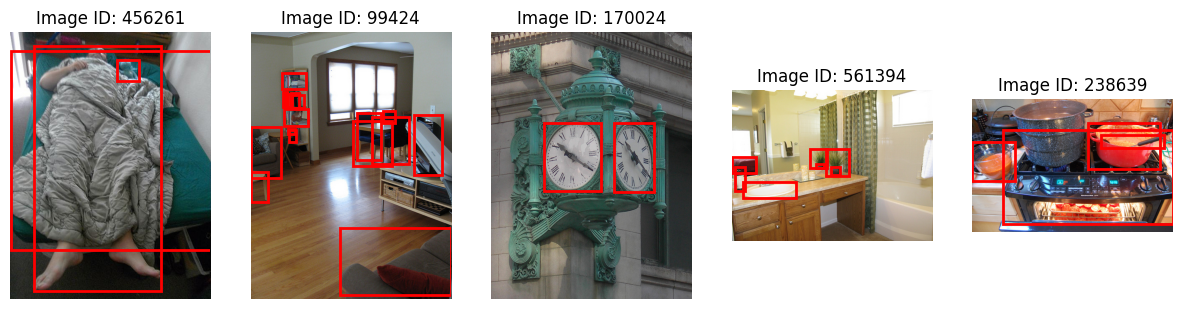

In [22]:
# Display sample images with bounding boxes from the training set
print("Sample images from the training set:")
display_samples(train_image_dir, train_annotations)

Sample images from the validation set:


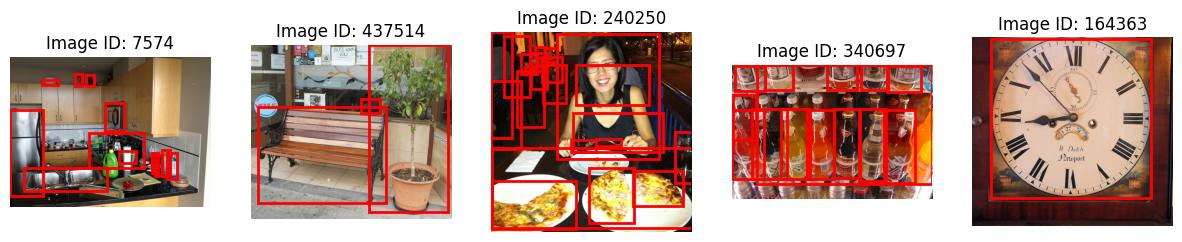

In [23]:
# Display sample images with bounding boxes from the validation set
print("Sample images from the validation set:")
display_samples(val_image_dir, val_annotations)